# To predict loan status



### Business Objective:
To predict the impact of the incident raised by the customer.

### Data Set Details:
It’s not at all easy to get a loan from the bank. Getting a loan approved requires a complex mix of factors not the least of which is a steady income! So this ML project aims **to create a model that will classify how much loan the user can obtain** based on various factors such as the user’s marital status, income, education, employment prospects, number of dependents, etc. The dataset attached provides details about all these factors which can then be used to create an ML model that demonstrates the amount of loan that can be approved

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data
data_train = pd.read_csv("C:/Users/ASHWINI/Downloads/assignment/bank data/train.csv")
train=data_train.copy()
data_test=pd.read_csv("C:/Users/ASHWINI/Downloads/assignment/bank data/test.csv")
test=data_test.copy()

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

## Exploratory Data Analysis

In [5]:
# look the data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
#check no. of rows and columns
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train.dtypes #checking the datatypes of the features.

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [11]:
#Counting the null values
train.isnull().sum()       #we can see that the Credit_History has highest number of null values in the dataset.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#Checking null values for test dataset
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [13]:
#describe the numerical columns
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## Univariate Analysis

### Independent Variable: Categorical Data Analysis

#### Analysis on Feature "Gender"

In [15]:
train['Gender'].count()    #Total number of count in Gender column

601

In [16]:
train['Gender'].value_counts()    #Total values belongs to each class in the Gender column

Male      489
Female    112
Name: Gender, dtype: int64

In [17]:
train['Gender'].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

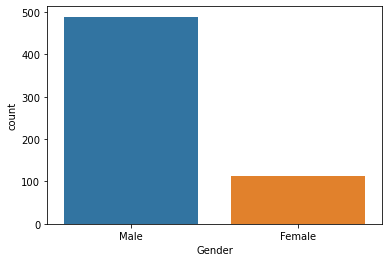

In [18]:
#Visualizing of each class from Gender column
sns.countplot('Gender',data=train) 

Conclusion : Most of the applicants applied for the loan are males compared to female.

#### Analysis on Feature "Married"

In [19]:
#Total number of count in Married column
train['Married'].count()

611

In [20]:
#Total values belongs to each class in the Married column
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [21]:
train['Married'].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

<AxesSubplot:xlabel='Married', ylabel='count'>

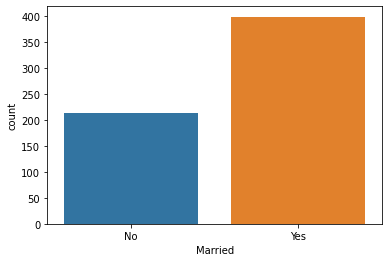

In [22]:
#Visualizing of each class from Married column
sns.countplot('Married',data=train)

Conclusion : The most of the applicants who are married have applied for the loan.

#### Analysis on Feature "Self_Employed" 

In [23]:
#Total number of count in Self_Employed column
train['Self_Employed'].count()

582

In [24]:
#Total values belongs to each class in the Self_Employed column
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
train['Self_Employed'].value_counts(normalize=True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

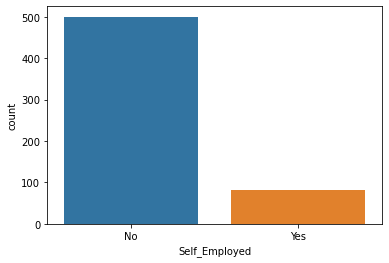

In [26]:
#Visualizing of each class from Gender column
sns.countplot('Self_Employed',data=train)

Conclusion : Most of the applicants applying for the loan are not self employed.

#### Analysis on Feature "Credit_History"

In [27]:
#Total number of count in Credit_History column
train['Credit_History'].count()

564

In [28]:
#Total values belongs to each class in the Credit_History column
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [29]:
train['Credit_History'].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

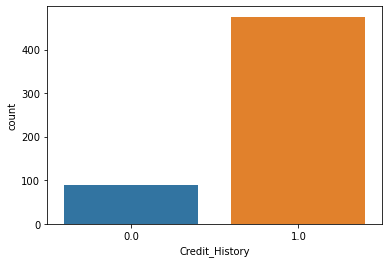

In [30]:
#Visualizing of each class from Credit_History column
sns.countplot('Credit_History',data=train)

Most of the applicants whose credit history is 1 have applied for the loan

### Independent Variable: Ordinal Data Analysis

#### Analysis on Feature Education 

In [31]:
#Total values belongs to Education column
train['Education'].count()

614

In [32]:
#Total values belongs to each class in the Education column
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [33]:
train['Education'].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='count'>

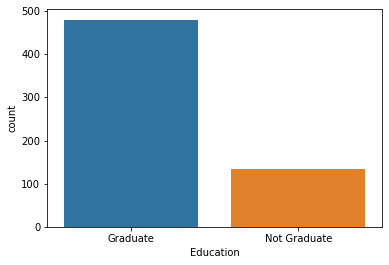

In [34]:
#Visualizing of each class from Education column
sns.countplot('Education',data=train)

Most of the applicants who are graduated have applied for the loan.

#### Analysis on Feature Property_Area

In [35]:
#Total values belongs to Property_Area column
train['Property_Area'].count()

614

In [36]:
#Total values belongs to each class in the Property_Area column
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [37]:
train['Property_Area'].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

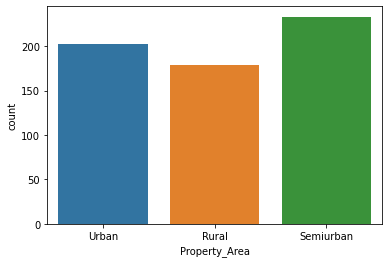

In [38]:
#Visualizing of each class from Property_Area column
sns.countplot('Property_Area',data=train)

The applicants from all the property area applied for the loan.

#### Analysis on Feature Dependents

In [39]:
#Total values belongs to Dependents column
train['Dependents'].count()

599

In [40]:
#Total values belongs to each class in the Dependents column
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [41]:
train['Dependents'].value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

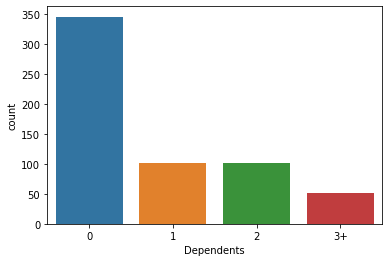

In [42]:
#Visualization of Dependents column
sns.countplot('Dependents',data=train)

Most of the applicants don't have any dependent 

### Independent Variable: Numerical Data Analysis

#### Analysis on Feature ApplicantIncome

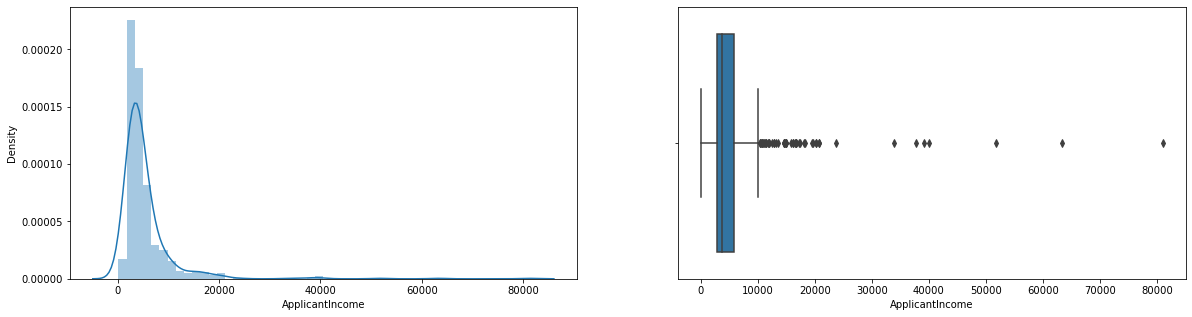

In [43]:
#Visualization and boxplot of ApplicantIncome column
plt.figure(figsize=(20,5));
plt.subplot(121);
sns.distplot(train['ApplicantIncome']);
plt.subplot(122);
sns.boxplot(train['ApplicantIncome'])
plt.show()

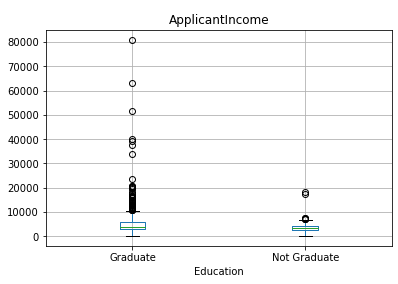

In [44]:
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

#### Analysis on Feature CoapplicantIncome

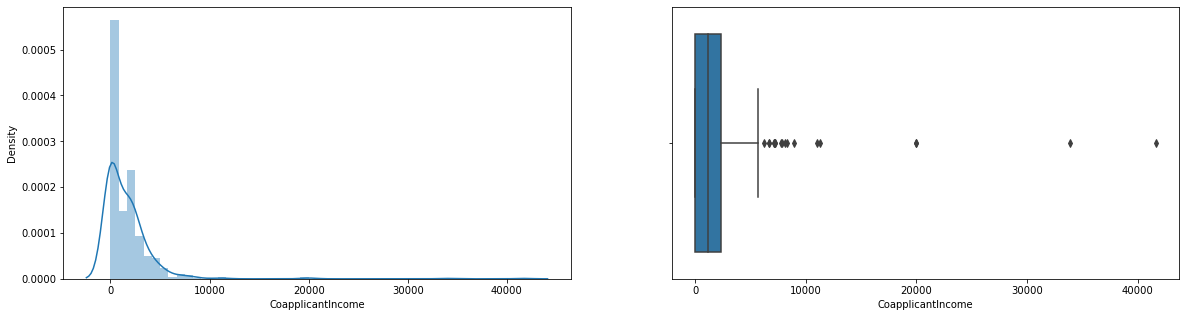

In [45]:
#Visualization and boxplot of CoapplicantIncome column
plt.figure(figsize=(20,5));
plt.subplot(121);
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122);
sns.boxplot(train['CoapplicantIncome'])
plt.show()

#### Analysis on Feature Loan_Amount_Term

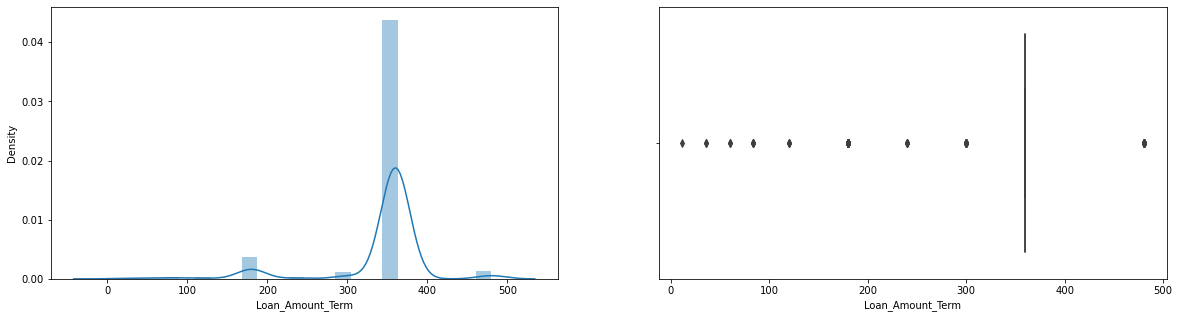

In [46]:
#Visualization and boxplot of Loan_Amount_Term column
plt.figure(figsize=(20,5));
plt.subplot(121); 
sns.distplot(train['Loan_Amount_Term']);
plt.subplot(122);sns.boxplot(train['Loan_Amount_Term'])
plt.show()

#### Analysis on Feature LoanAmount

In [47]:
df=data_train.copy()

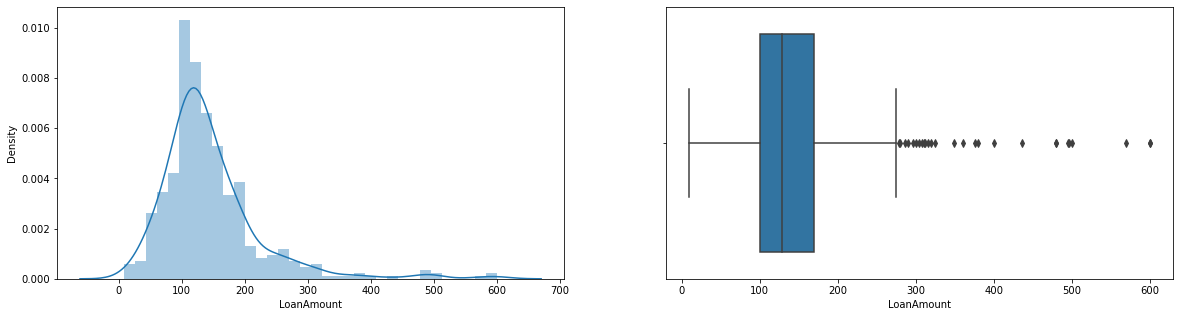

In [48]:
#Visualization and boxplot of LoanAmount column
plt.figure(figsize=(20,5));
plt.subplot(121);
df=df.dropna()
sns.distplot(df['LoanAmount']);
plt.subplot(122);
sns.boxplot(df['LoanAmount'])
plt.show()

### Dependent Variable: Loan_Status

In [49]:
#Counting total values in the column Loan_Status
train['Loan_Status'].count()

614

In [50]:
#Counting values belongs to each class of the Loan_Status column
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [51]:
train['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

Y    422
N    192
Name: Loan_Status, dtype: int64


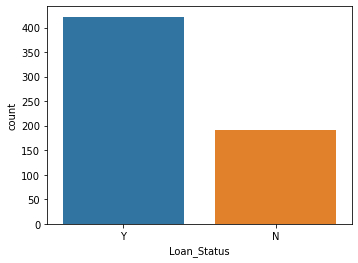

In [52]:
#Visualization of Loan_status Variable
plt.figure(figsize=(12,4));plt.subplot(122);sns.countplot(train['Loan_Status'])
print(train['Loan_Status'].value_counts())

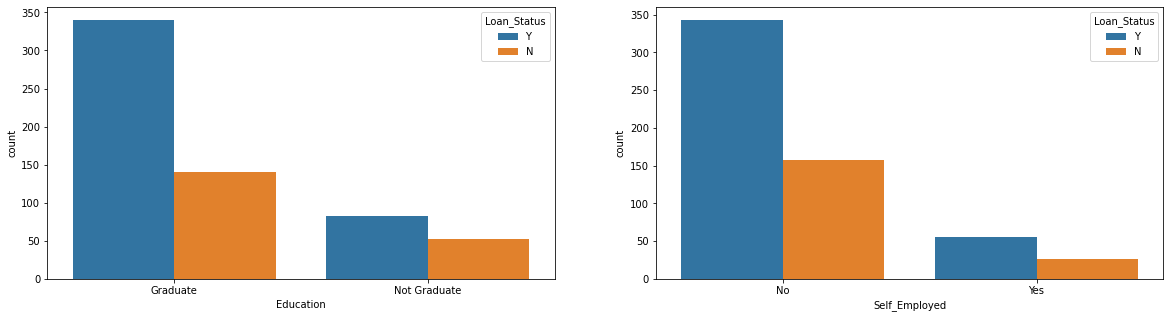

In [53]:
#Bivariate Analysis
plt.figure(figsize=(20,5));
plt.subplot(121);
sns.countplot('Education', hue='Loan_Status',data=train)
plt.subplot(122);
sns.countplot('Self_Employed', hue='Loan_Status',data=train);
plt.show()

Most of the applicants who are Graduated got the loan and the people who are not Graduated also got the loan.
Same goes for Self_Employed people.

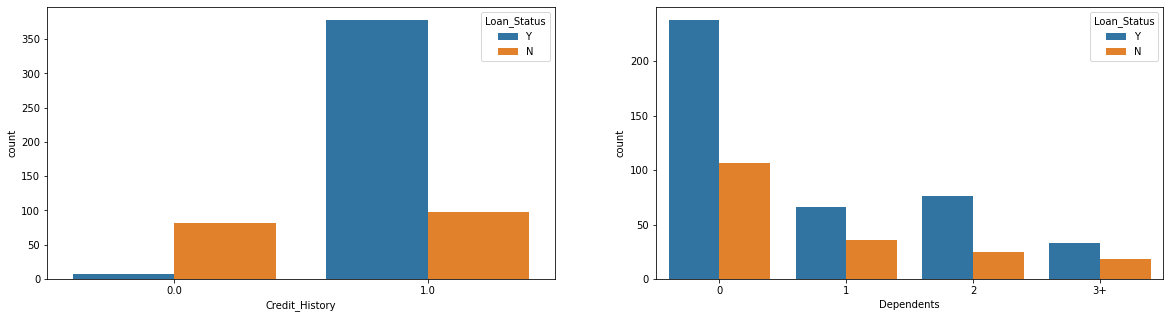

In [54]:
plt.figure(figsize=(20,5));
plt.subplot(121);
sns.countplot('Credit_History', hue='Loan_Status',data=train)
plt.subplot(122);
sns.countplot('Dependents', hue='Loan_Status',data=train);
plt.show()


The applicants whose Credit_History is 1 have high chances to get the loan.
Also the applicants those who do not have any Dependents have high chance to get the loan.

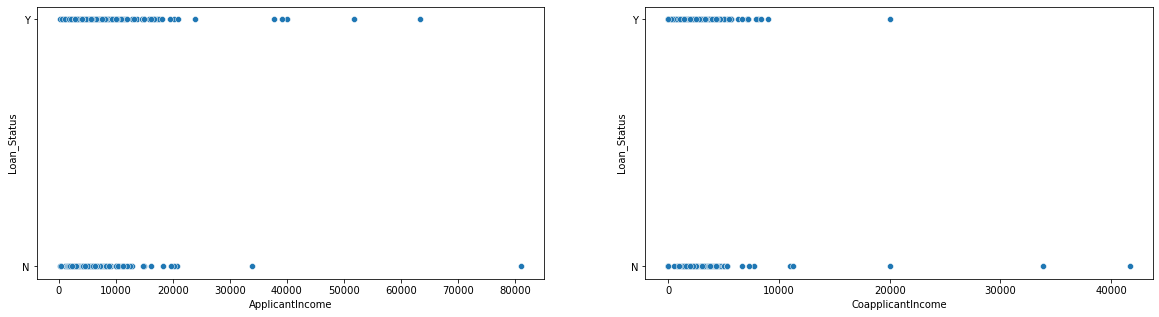

In [55]:
plt.figure(figsize=(20,5))
plt.subplot(121);
sns.scatterplot(x='ApplicantIncome',y='Loan_Status',data=train);
plt.subplot(122);
sns.scatterplot(x='CoapplicantIncome',y='Loan_Status',data=train);
plt.show()

## Bivariate Analysis 

### Categorical Independent Variables Vs Dependent Variable

#### Analysis of Gender Vs Loan_Status

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339





<AxesSubplot:xlabel='Gender', ylabel='count'>

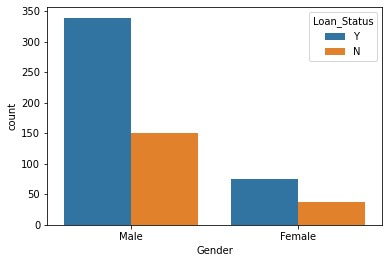

In [56]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))
print('\n\n')

sns.countplot('Gender', hue='Loan_Status',data=train)

#### Analysis of Married Vs Loan_Status

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285





<AxesSubplot:xlabel='Married', ylabel='count'>

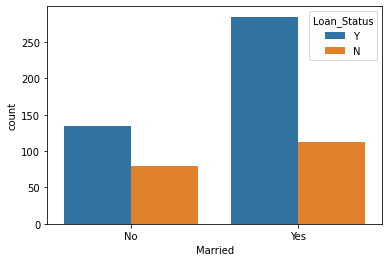

In [57]:
print(pd.crosstab(train['Married'],train['Loan_Status']))
print('\n\n')

sns.countplot('Married', hue='Loan_Status',data=train)

#### Analysis of Self_Employed Vs Loan_Status

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56





<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

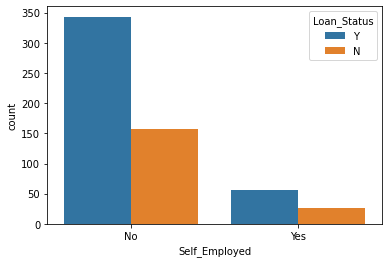

In [58]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))
print('\n\n')

sns.countplot('Self_Employed', hue='Loan_Status',data=train)

#### Feature Analysis of Credit_History Vs Loan_Status

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378





<AxesSubplot:xlabel='Credit_History', ylabel='count'>

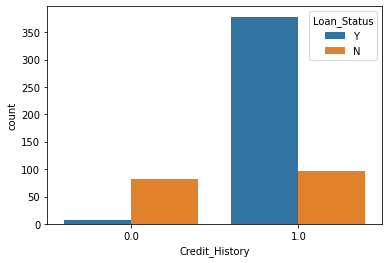

In [59]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))
print('\n\n')

sns.countplot('Credit_History', hue='Loan_Status',data=train)

The applicants whose credit history is 0 have high chances to reject the loan and the applicants whose credit history is 1 have high chances to get the loan.

### Ordinal Variables Vs Dependent Variables

#### Feature Analysis of Education Vs Loan_Status

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82





<AxesSubplot:xlabel='Education', ylabel='count'>

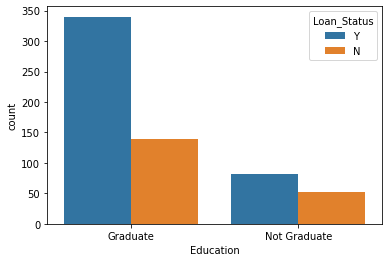

In [60]:
print(pd.crosstab(train['Education'],train['Loan_Status']))
print('\n\n')

sns.countplot('Education', hue='Loan_Status',data=train)

The applicants who are graduated have higher chances to get the loan than no graduated applicants.

#### Feature Analysis of Dependents Vs Loan_Status

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33





<AxesSubplot:xlabel='Dependents', ylabel='count'>

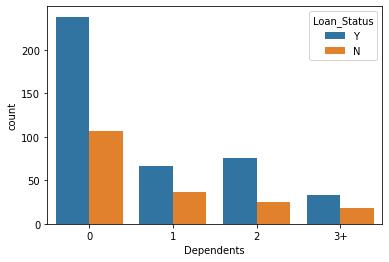

In [61]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))
print('\n\n')

sns.countplot('Dependents', hue='Loan_Status',data=train)

The applicants who have 0, 1 or 2 dependents have more chances to get the loan compared to 3+ dependents.

#### Feature Analysis of Property_Area Vs Loan_Status

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133





<AxesSubplot:xlabel='Property_Area', ylabel='count'>

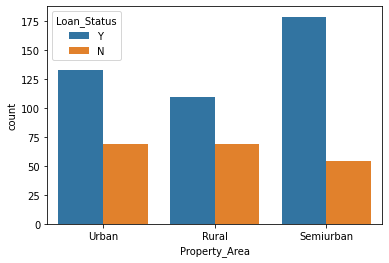

In [62]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))
print('\n\n')

sns.countplot('Property_Area', hue='Loan_Status',data=train)

The applicants who have properties in semiurban area have high chances to get the loan.

### Numerical Variables Vs Dependent Variable

#### Feature Analysis of ApplicantIncome Vs Loan_Status

<Figure size 720x360 with 0 Axes>

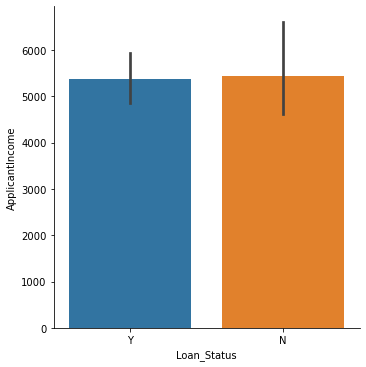

In [63]:
plt.figure(figsize=(10,5))
sns.catplot(x="Loan_Status", y="ApplicantIncome", kind="bar", data=train)
plt.show()

<AxesSubplot:>

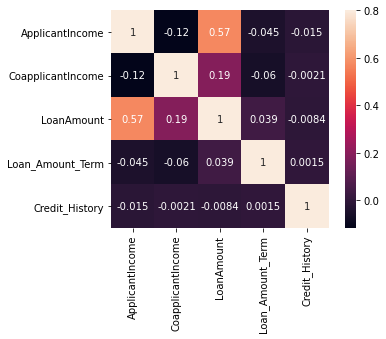

In [64]:
data=train.corr()
#f,ax=plt.subplots()
sns.heatmap(data,vmax=.8,square=True,annot=True)

## Preprocessing

#### Checking for Null/Missing Values

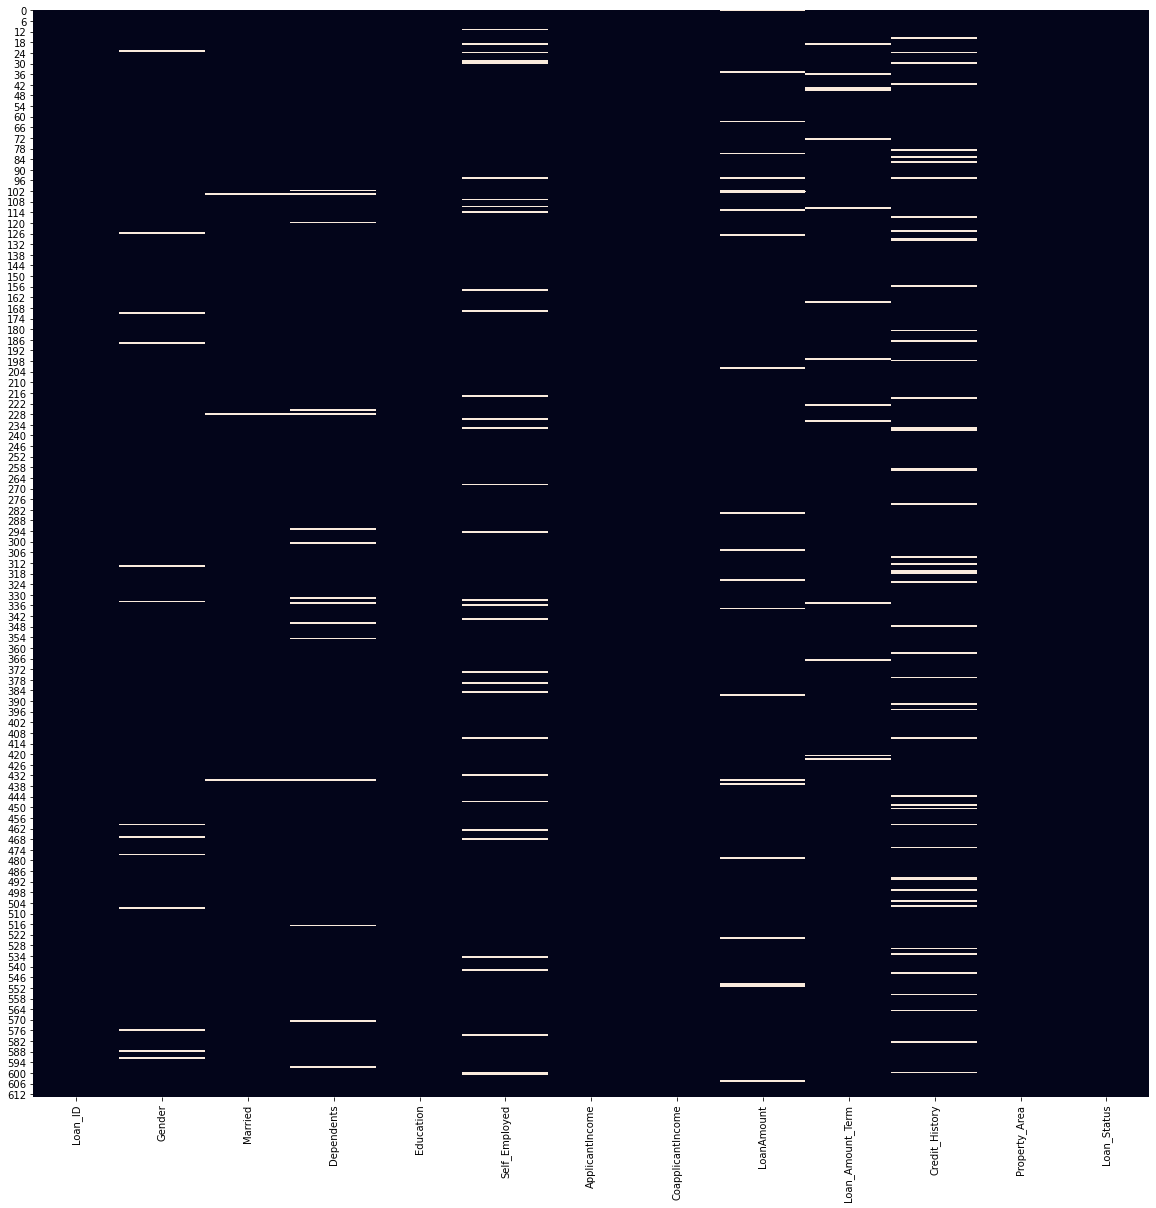

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(train.isnull(), cbar=False)
plt.show()

In [66]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [67]:
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

#### Data Cleaning

In [68]:
# ckeck duplicate entries
train.duplicated().any()

False

In [69]:
# drop 'loan ID' column because it is not usefull
train.drop('Loan_ID', axis=1, inplace=True)
test.drop('Loan_ID', axis=1, inplace=True)

#### Imputing missing values

In [70]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode().values[0])
train['Married'] = train['Married'].fillna(train['Married'].mode().values[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode().values[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode().values[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode().values[0])

In [71]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [72]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode().values[0])
test['Married'] = test['Married'].fillna(test['Married'].mode().values[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode().values[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode().values[0])
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode().values[0])

In [73]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Conversion of Categorical data into Numerical data

In [74]:
train["Gender"] = train["Gender"].map({"Male":1, "Female":0})
train["Married"] = train["Married"].map({"Yes":1, "No":0})
train['Dependents'].replace('3+', 3,inplace=True)
train['Dependents'] = train['Dependents'].astype(np.int)
train["Self_Employed"] = train["Self_Employed"].map({"Yes":1, "No":0})
train['Property_Area']=train['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0})

In [75]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,2,1


In [76]:
test["Gender"] = test["Gender"].map({"Male":1, "Female":0})
test["Married"] = test["Married"].map({"Yes":1, "No":0})
#test['Dependents'] = test['Dependents'].str.rstrip('+')
test['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'] = test['Dependents'].astype(np.int)
test["Self_Employed"] = test["Self_Employed"].map({"Yes":1, "No":0})
test['Property_Area']=test['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})


In [77]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,2,1


#### Label Encoding of Variable Education 

In [78]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
train['Education'] = LabelEncoder().fit_transform(train['Education'])
test['Education'] = LabelEncoder().fit_transform(test['Education'])

#### Removal of the Outliers using Log Transformation

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

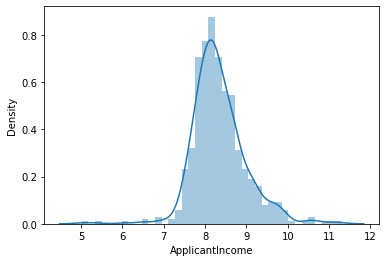

In [79]:
applicant=np.log(train['ApplicantIncome'])
sns.distplot(applicant)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

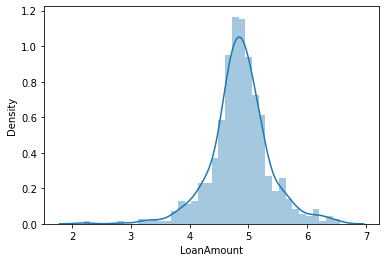

In [80]:
loan=np.log(train['LoanAmount'])
sns.distplot(loan)

In [81]:
# scaling data in Range [0,1]
scaler = MinMaxScaler()
train.ApplicantIncome = scaler.fit_transform(np.array(train.ApplicantIncome).reshape(-1,1))
train.CoapplicantIncome = scaler.fit_transform(np.array(train.CoapplicantIncome).reshape(-1,1))
train.LoanAmount = scaler.fit_transform(np.array(train.LoanAmount).reshape(-1,1))
train.Loan_Amount_Term = scaler.fit_transform(np.array(train.Loan_Amount_Term).reshape(-1,1))

#### Scatter plot and Correlation analysis

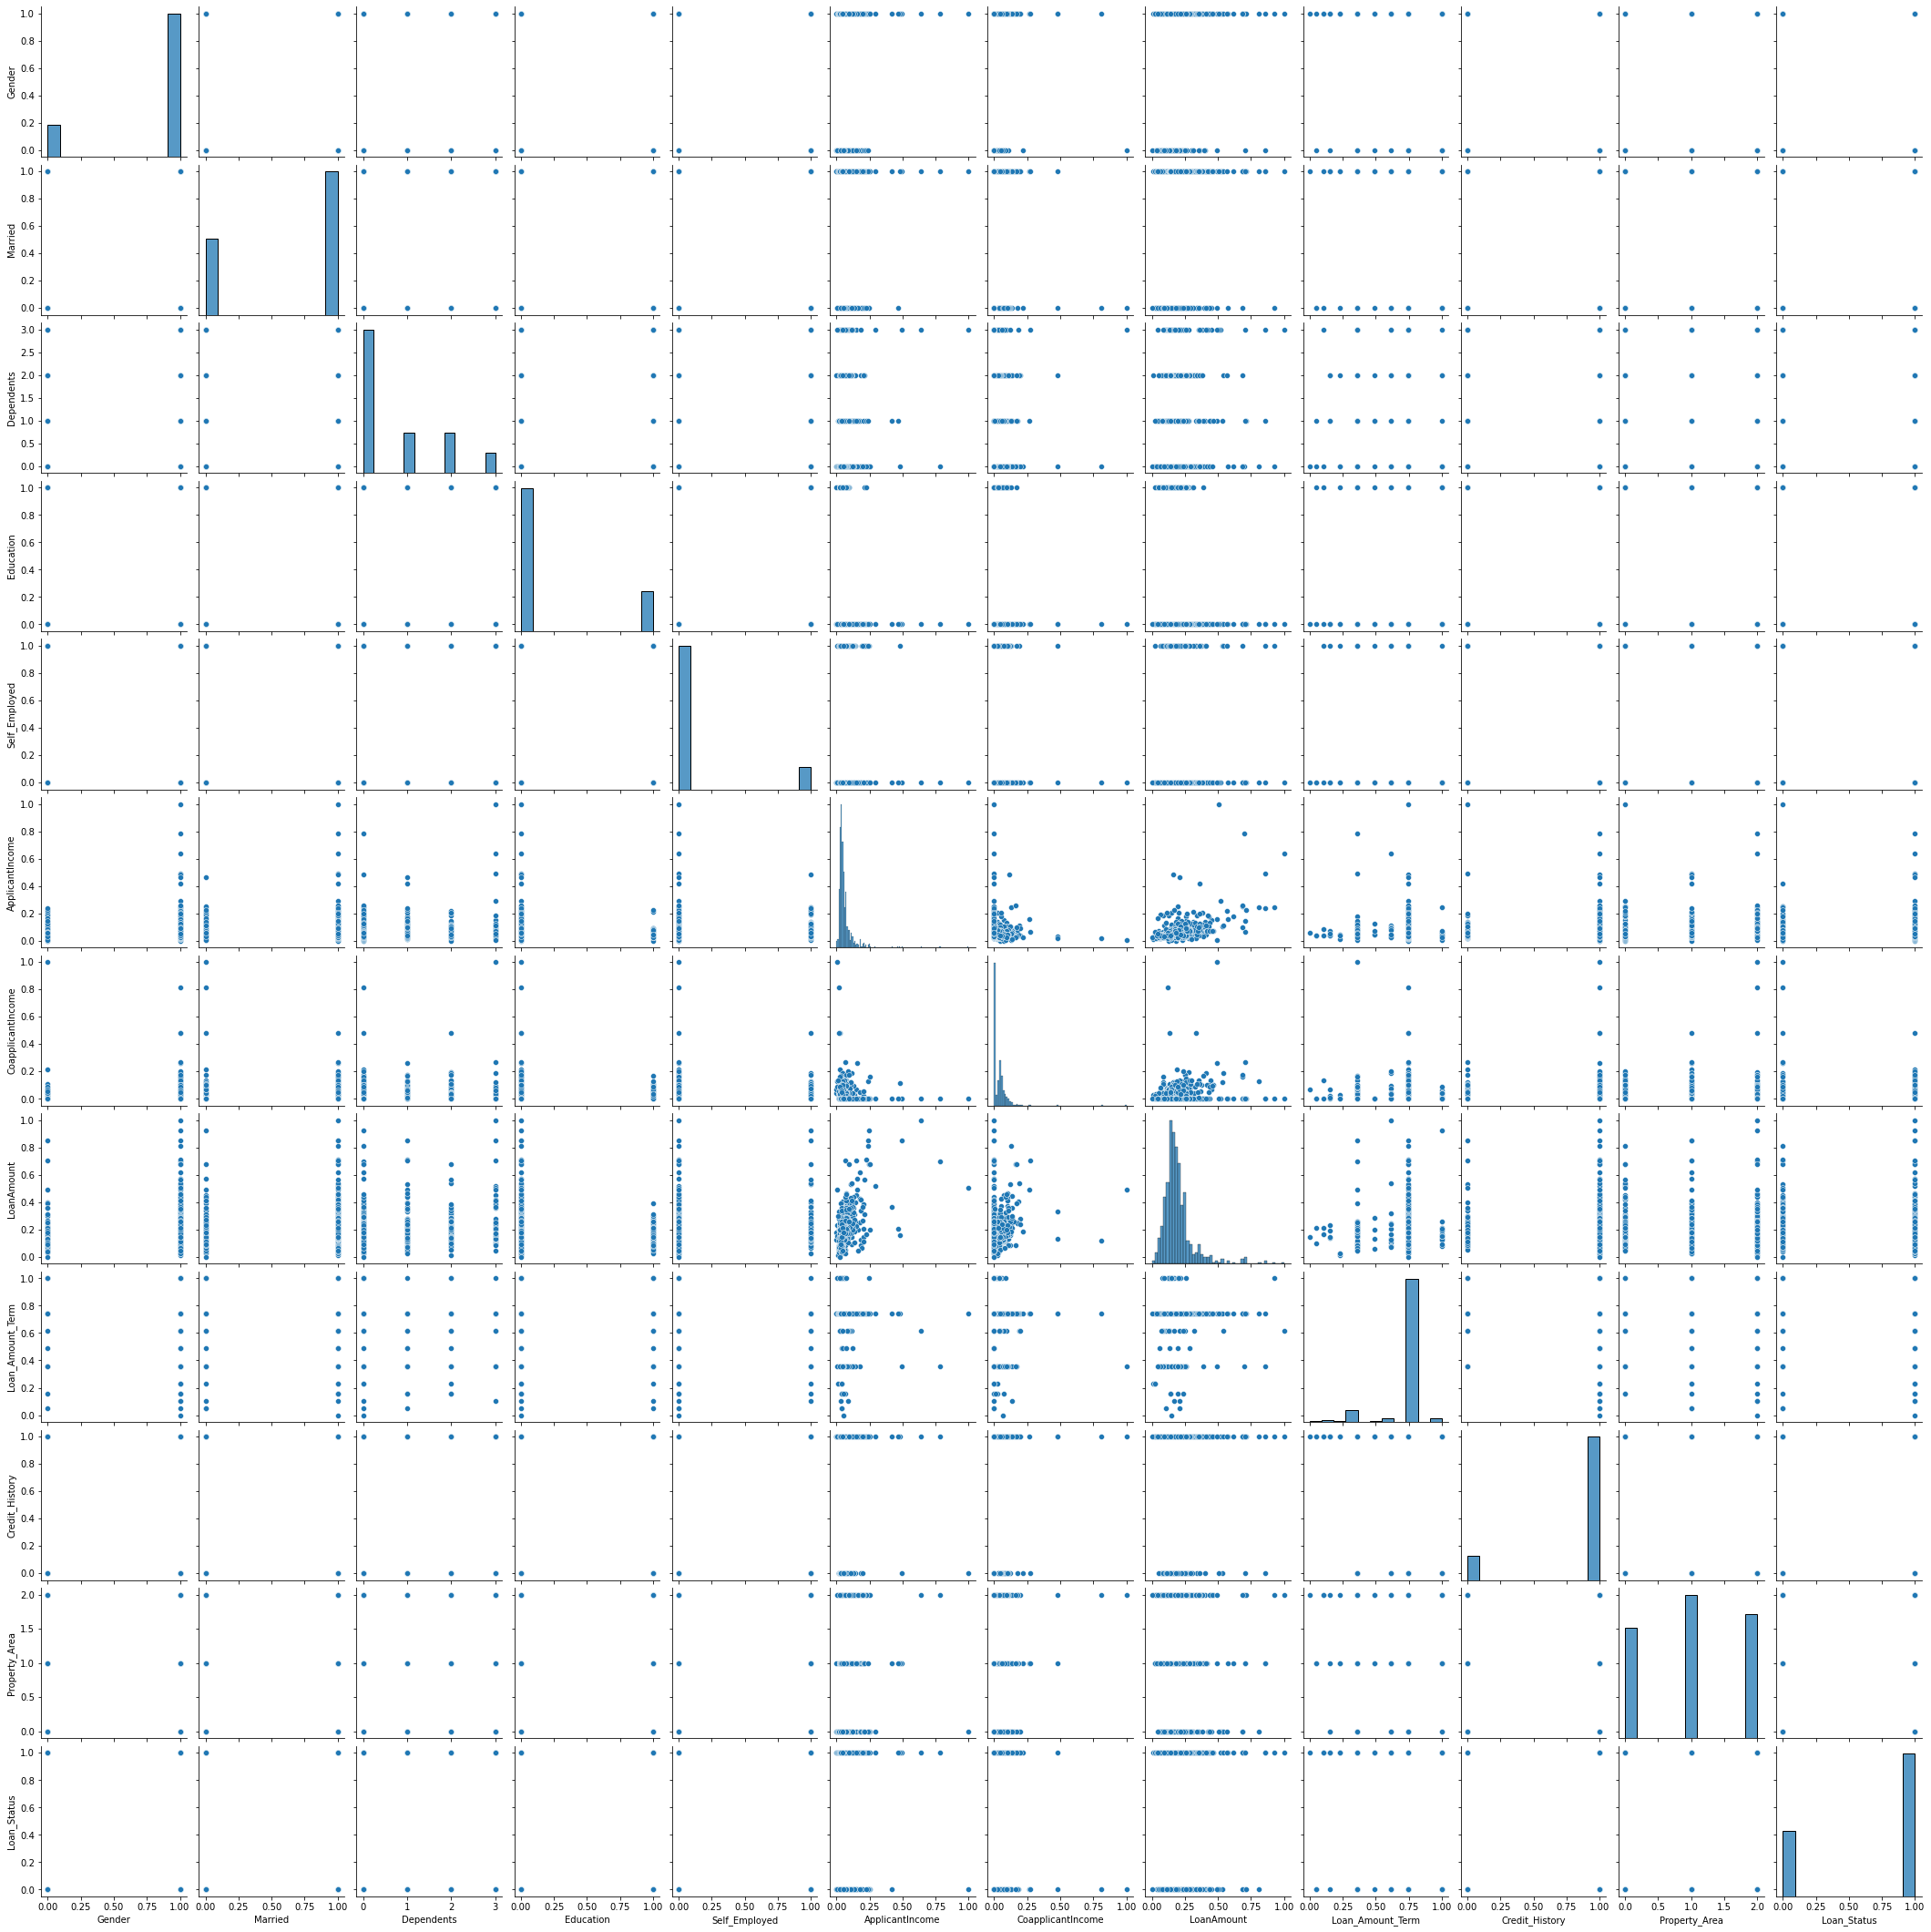

In [82]:
sns.pairplot(train)

### EXTRACTING REGRESSORS AND TARGET VARIABLE FROM THE DATA SET.

In [83]:
x=train.drop(['Loan_Status'],axis=1)
y=train['Loan_Status']

### COVERT IT INTO DUMMIES.

In [84]:
X = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

## MODEL BUILDING.

### BUILDING A LOGISTIC REGRESSION MODEL.

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,roc_auc_score,precision_recall_curve
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)
LogisticRegression()

LogisticRegression()

In [87]:
y_pred_LR = model_LR.predict(x_test)
Acc_LR = accuracy_score(y_test,y_pred_LR)
precision = precision_score(y_test,y_pred_LR)
Report_LR = classification_report(y_test,y_pred_LR)
recall = recall_score(y_test,y_pred_LR)
fscore = f1_score(y_test,y_pred_LR)
roc = roc_auc_score(y_test,y_pred_LR)

print(Report_LR)
print("Accuracy : {}".format(Acc_LR))
print("Precision : {}".format(precision))
print("Recall : {}".format(recall))
print("F1-Score : {}".format(fscore))
print("Roc : {}".format(roc))

              precision    recall  f1-score   support

           0       0.88      0.44      0.59        34
           1       0.82      0.98      0.89        89

    accuracy                           0.83       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.84      0.83      0.81       123

Accuracy : 0.8292682926829268
Precision : 0.8207547169811321
Recall : 0.9775280898876404
F1-Score : 0.8923076923076922
Roc : 0.7093522802379378


### BUILDING A DECISION TREE MODEL.

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
model_DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)

In [90]:
model_DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [91]:
y_pred = model_DT.predict(x_test)
Acc_DT = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
Report_DT = classification_report(y_test,y_pred)
recall = recall_score(y_test,y_pred)
fscore = f1_score(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)

print(Report_DT)
print("Accuracy : {}".format(Acc_DT))
print("Precision : {}".format(precision))
print("Recall : {}".format(recall))
print("F1-Score : {}".format(fscore))
print("Roc : {}".format(roc))

              precision    recall  f1-score   support

           0       0.74      0.41      0.53        34
           1       0.81      0.94      0.87        89

    accuracy                           0.80       123
   macro avg       0.77      0.68      0.70       123
weighted avg       0.79      0.80      0.78       123

Accuracy : 0.7967479674796748
Precision : 0.8076923076923077
Recall : 0.9438202247191011
F1-Score : 0.8704663212435233
Roc : 0.677792465300727


### BUILDING A RANDOM FOREST MODEL.

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
model_RF = RandomForestClassifier(criterion = 'gini', max_depth = 5)

In [94]:
model_RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [95]:
y_pred = model_RF.predict(x_test)
Acc_RF = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
Report_RF = classification_report(y_test,y_pred)
recall = recall_score(y_test,y_pred)
fscore = f1_score(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)

print(Report_RF)
print("Accuracy : {}".format(Acc_RF))
print("Precision : {}".format(precision))
print("Recall : {}".format(recall))
print("F1-Score : {}".format(fscore))
print("Roc : {}".format(roc))

              precision    recall  f1-score   support

           0       0.88      0.44      0.59        34
           1       0.82      0.98      0.89        89

    accuracy                           0.83       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.84      0.83      0.81       123

Accuracy : 0.8292682926829268
Precision : 0.8207547169811321
Recall : 0.9775280898876404
F1-Score : 0.8923076923076922
Roc : 0.7093522802379378


## BUILDING A KNN MODEL

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
# Declare the model
model_KNN = KNeighborsClassifier(n_neighbors=12)

# Train the model
model_KNN.fit(x_train, y_train)
y_pred = model_KNN.predict(x_test)

In [98]:
Acc_KNN = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
Report_KNN = classification_report(y_test,y_pred)
recall = recall_score(y_test,y_pred)
fscore = f1_score(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)

print(Report_KNN)
print("Accuracy : {}".format(Acc_KNN))
print("Precision : {}".format(precision))
print("Recall : {}".format(recall))
print("F1-Score : {}".format(fscore))
print("Roc : {}".format(roc))

              precision    recall  f1-score   support

           0       0.82      0.26      0.40        34
           1       0.78      0.98      0.87        89

    accuracy                           0.78       123
   macro avg       0.80      0.62      0.63       123
weighted avg       0.79      0.78      0.74       123

Accuracy : 0.7804878048780488
Precision : 0.7767857142857143
Recall : 0.9775280898876404
F1-Score : 0.8656716417910447
Roc : 0.6211169861202908


In [99]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
n_neighbors = np.array(range(1,60))
param_grid = dict(n_neighbors=n_neighbors)
model_KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=model_KNN, param_grid=param_grid)
grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.7474541331684188
{'n_neighbors': 18}


## BUILDING A SVM MODEL

In [100]:
from sklearn import svm
from sklearn.svm import SVC

##### Linear Support Vector Machine

In [101]:

model_SVM = SVC(gamma=0.7)
model_SVM.fit(x_train, y_train)
y_pred = model_SVM.predict(x_test)

Acc_SVM = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
Report_SVM = classification_report(y_test,y_pred)
recall = recall_score(y_test,y_pred)
fscore = f1_score(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)

print(Report_SVM)
print("Accuracy : {}".format(Acc_SVM))
print("Precision : {}".format(precision))
print("Recall : {}".format(recall))
print("F1-Score : {}".format(fscore))
print("Roc : {}".format(roc))

              precision    recall  f1-score   support

           0       0.88      0.44      0.59        34
           1       0.82      0.98      0.89        89

    accuracy                           0.83       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.84      0.83      0.81       123

Accuracy : 0.8292682926829268
Precision : 0.8207547169811321
Recall : 0.9775280898876404
F1-Score : 0.8923076923076922
Roc : 0.7093522802379378


##### Radical Support Vector Machine

## BUILDING A Naive Bayes MODEL

In [102]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
model_NB = GaussianNB() 
model_NB.fit(x_train, y_train) 
  
# making predictions on the testing set 
y_pred = model_NB.predict(x_test) 
  
Acc_NB = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
Report_NB = classification_report(y_test,y_pred)
recall = recall_score(y_test,y_pred)
fscore = f1_score(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)



print(Report_NB)
print("Accuracy : {}".format(Acc_NB))
print("Precision : {}".format(precision))
print("Recall : {}".format(recall))
print("F1-Score : {}".format(fscore))
print("Roc : {}".format(roc))

              precision    recall  f1-score   support

           0       0.80      0.47      0.59        34
           1       0.83      0.96      0.89        89

    accuracy                           0.82       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.82      0.82      0.80       123

Accuracy : 0.8211382113821138
Precision : 0.8252427184466019
Recall : 0.9550561797752809
F1-Score : 0.8854166666666667
Roc : 0.7128222075346993


## BUILDING A XGboost MODEL

In [103]:
from xgboost import XGBClassifier

model_XGB=XGBClassifier() 
model_XGB.fit(x_train, y_train) 
y_pred= model_XGB.predict(x_test) 

Acc_XGB = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
Report_XGB = classification_report(y_test,y_pred)
recall = recall_score(y_test,y_pred)
fscore = f1_score(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)

print(Report_XGB)
print("Accuracy: {}".format(Acc_XGB))
print("Precision : {}".format(precision))
print("Recall : {}".format(recall))
print("F1-Score : {}".format(fscore))
print("Roc : {}".format(roc))

[15:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.52      0.47      0.49        34
           1       0.80      0.83      0.82        89

    accuracy                           0.73       123
   macro avg       0.66      0.65      0.65       123
weighted avg       0.72      0.73      0.73       123

Accuracy: 0.7317073170731707
Precision : 0.8043478260869565
Recall : 0.8314606741573034
F1-Score : 0.8176795580110497
Roc : 0.6510244547257106


## BUILDING A Neural network  MODEL

In [104]:
from sklearn.neural_network import MLPClassifier
model_NN = MLPClassifier(hidden_layer_sizes = (4,4))
model_NN.fit(np.array(x_train), np.array(y_train))

MLPClassifier(hidden_layer_sizes=(4, 4))

In [105]:
y_pred = model_NN.predict(x_test)

Acc_NN = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
Report_NN = classification_report(y_test,y_pred)
recall = recall_score(y_test,y_pred)
fscore = f1_score(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)


print(Report_NN)
print("Accuracy : {}".format(Acc_NN))
print("Precision : {}".format(precision))
print("Recall : {}".format(recall))
print("F1-Score : {}".format(fscore))
print("Roc : {}".format(roc))

              precision    recall  f1-score   support

           0       0.88      0.44      0.59        34
           1       0.82      0.98      0.89        89

    accuracy                           0.83       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.84      0.83      0.81       123

Accuracy : 0.8292682926829268
Precision : 0.8207547169811321
Recall : 0.9775280898876404
F1-Score : 0.8923076923076922
Roc : 0.7093522802379378


## After building all the models we can conclude that the Logistic Regression model has upper hand as compared to other models.
## So we can conclude that Logistic Regression model is best fit model for given data set.

### Predicting the target column in the test data set using Logistic Regression model.

In [106]:
y_predicted = model_LR.predict(test)

In [107]:
#Converting numpy array into dataframe
Loan_Status = pd.DataFrame(y_predicted, columns = ['Loan_Status'])

In [108]:
test_data = pd.concat([test, Loan_Status], axis = 1)
test_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,0
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,0
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2,0
6,0,0,1,1,0,2226,0,59.0,360.0,1.0,1,1
7,1,1,2,1,0,3881,0,147.0,360.0,0.0,0,1
8,1,1,2,0,0,13633,0,280.0,240.0,1.0,2,1
9,1,0,0,1,0,2400,2400,123.0,360.0,1.0,1,0


In [109]:
test_data['Loan_Status'].value_counts()

1    225
0    142
Name: Loan_Status, dtype: int64

## Model Deployment

In [110]:
import pickle 
pickle.dump(model_LR, open('loan_prediction_LR.pkl', 'wb'))

In [111]:
# saving the model 
import pickle 
pickle_out = open("loan_prediction_LR.pkl", mode = "wb") 
pickle.dump(model_LR, pickle_out) 
pickle_out.close()

In [112]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('loan_prediction_LR.pkl', 'rb') 
model_LR = pickle.load(pickle_in)
 
def run():
    st.title("BANK LOAN PREDICTOR")

   
    ## For gender
    gen_display = ('Female','Male')
    gen_options = list(range(len(gen_display)))
    Gender = st.selectbox("Gender",gen_options, format_func=lambda x: gen_display[x])

    ## For Marital Status
    mar_display = ('No','Yes')
    mar_options = list(range(len(mar_display)))
    Married = st.selectbox("Marital Status", mar_options, format_func=lambda x: mar_display[x])

    ## No of dependets
    dep_display = ('0','1','2','3')
    dep_options = list(range(len(dep_display)))
    Dependents = st.selectbox("Dependents",  dep_options, format_func=lambda x: dep_display[x])

    ## For education
    edu_display = ('Not Graduate','Graduate')
    edu_options = list(range(len(edu_display)))
    Education = st.selectbox("Education",edu_options, format_func=lambda x: edu_display[x])

    ## For Employment status
    emp_display = ('Yes','No')
    emp_options = list(range(len(emp_display)))
    Self_Employed = st.selectbox("Employment Status",emp_options, format_func=lambda x: emp_display[x])

    ## For Property area
    prop_display = ('Rural','Semi-Urban','Urban')
    prop_options = list(range(len(prop_display)))
    Property_Area = st.selectbox("Property Area",prop_options, format_func=lambda x: prop_display[x])

    ## For Credit history
    cred_display = ('0','1')
    cred_options = list(range(len(cred_display)))
    Credit_History = st.selectbox("Credit History",cred_options, format_func=lambda x: cred_display[x])

    ## Applicant Income
    ApplicantIncome = st.number_input("Applicant's Monthly Income",value=0)

    ## Co-Applicant Income
    CoapplicantIncome = st.number_input("Co-Applicant's Monthly Income",value=0)

    ## Loan Aount
    Loan_Amount = st.number_input("Loan Amount",value=0)

    ## loan amount term
    Loan_Amount_Term = st.number_input("Loan Amount Term(in months)",value=0)

    if st.button("Submit"):
        features = [[Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, Loan_Amount, Loan_Amount_Term, Credit_History, Property_Area]]
        print(features)
        prediction = model_LR.predict(features)
        lc = [str(i) for i in prediction]
        ans = int("".join(lc))
        if ans == 0:
            st.error(
                'According to our Calculations, you will not get the loan from Bank'
            )
        else:
            st.success(
                'Congratulations!! you will get the loan from Bank'
            )

run()

Overwriting app.py


In [113]:
import sys
from streamlit import cli as stcli

if __name__ == '__main__':
    sys.argv = ["streamlit", "run", "app.py"]
    sys.exit(stcli.main())

RuntimeError: This event loop is already running


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.43.103:8501

[[1, 1, 0, 1, 1, 5720, 0, 110, 350, 1, 2]]
